In [2]:
import sys
sys.path.append('../src/')

import glob
import warnings

import numpy as np
import pandas as pd
import xarray as xr
# %%
from scipy.optimize import curve_fit, minimize

# Plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from cmocean import cm

from sklearn.linear_model import LinearRegression
from tools import alphabet, load_matfile, str2date

import warnings
warnings.simplefilter("ignore")

# set up figure params
sns.set(style='ticks', context='paper', palette='colorblind')
mpl.rc('figure', dpi=100, figsize=[11, 5])
mpl.rc('savefig', dpi=500, bbox='tight')
mpl.rc('legend', frameon=False)

In [59]:
T=10
t= np.linspace(0,T*10,200)
amp=3
u0=amp*1e-2
v0=amp*1e-2
u = u0 + amp*np.sin(2*np.pi*t/T)
v = v0 + amp*np.sin(2*np.pi*t/T + np.pi/2)

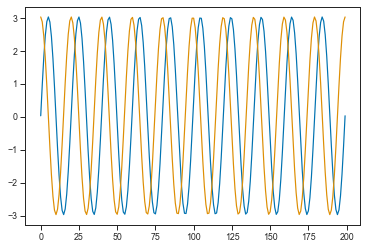

In [60]:
plt.plot(u)
plt.plot(v)

In [61]:
hke = 0.5*( u**2+v**2 )

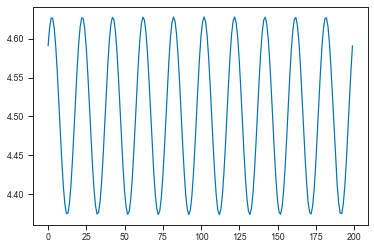

In [62]:
plt.plot(hke)

In [64]:
hke-4.5

array([ 0.0909    ,  0.1143977 ,  0.12667444,  0.12651649,  0.11393947,
        0.09018679,  0.05760678,  0.01942045, -0.02059691, -0.05848898,
       -0.09050955, -0.11349291, -0.12516682, -0.12437713, -0.11120191,
       -0.08694374, -0.05400089, -0.01563026,  0.02437463,  0.0620587 ,
        0.09369631,  0.11615962,  0.12722778,  0.12580654,  0.11203641,
        0.08727878,  0.05398131,  0.01543596, -0.02454649, -0.06201318,
       -0.09325995, -0.1151976 , -0.12565725, -0.12360482, -0.10924322,
       -0.08399231, -0.05034851, -0.01163803,  0.02831202,  0.06555198,
        0.09640012,  0.11780664,  0.12765519,  0.12497208,  0.11002258,
        0.08428467,  0.05030294,  0.01143698, -0.02847071, -0.06547467,
       -0.0959165 , -0.11678656, -0.12602153, -0.12270841, -0.10717474,
       -0.08095625, -0.04664505, -0.00763331,  0.03222208,  0.06898082,
        0.09900874,  0.11933714,  0.12795625,  0.12401394,  0.10789996,
        0.08120744,  0.04657532,  0.0074275 , -0.03236565, -0.06